In [540]:
import torch
import torchvision
import torchvision.transforms as transforms

In [541]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(16 * 4 * 4, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
    
net = Net()
net.load_state_dict(torch.load("LeNET_300_100_MNIST_Model"))

In [542]:
from torchsummary import summary
device=torch.device("cpu")
model=Net().to(device)
summary(model, input_size=(1, 28, 28), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
         MaxPool2d-2            [-1, 6, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]           2,416
         MaxPool2d-4             [-1, 16, 4, 4]               0
            Linear-5                  [-1, 300]          77,100
            Linear-6                  [-1, 100]          30,100
            Linear-7                   [-1, 10]           1,010
Total params: 110,782
Trainable params: 110,782
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.42
Estimated Total Size (MB): 0.47
----------------------------------------------------------------


In [543]:
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())
    print(param_tensor, "\t", net.state_dict()[param_tensor])

conv1.weight 	 torch.Size([6, 1, 5, 5])
conv1.weight 	 tensor([[[[-0.0192,  0.2511,  0.2183,  0.0210,  0.0190],
          [-0.0522,  0.3645,  0.3561,  0.5513,  0.3440],
          [ 0.0598,  0.5070,  0.6116,  0.6220,  0.2953],
          [ 0.2985,  0.1301,  0.4567,  0.1638,  0.2149],
          [-0.0246,  0.3206,  0.1249,  0.1288, -0.1632]]],


        [[[-0.1775, -0.0977,  0.0400,  0.2623,  0.2931],
          [ 0.0318, -0.1988, -0.1956,  0.1583,  0.1678],
          [-0.2439, -0.2983, -0.0792,  0.2235,  0.3461],
          [-0.0280, -0.2769, -0.1121,  0.0926,  0.3560],
          [-0.1970, -0.1645,  0.1938,  0.2115,  0.1824]]],


        [[[ 0.1362,  0.2118, -0.2154, -0.2076, -0.2334],
          [ 0.2467, -0.0821, -0.1670, -0.0738,  0.2066],
          [ 0.2564,  0.1952,  0.2048,  0.3864,  0.0963],
          [ 0.0786,  0.3546,  0.3418, -0.0168,  0.1037],
          [ 0.0178, -0.2039, -0.1759, -0.0146, -0.0048]]],


        [[[ 0.0299,  0.1694, -0.0029, -0.1827, -0.0718],
          [-0.1909, -

In [544]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=2)

In [545]:
i=0
for parameter in net.parameters():
    i+=1
    print(i," ",parameter.shape,"\n ",parameter,"\n\n")

1   torch.Size([6, 1, 5, 5]) 
  Parameter containing:
tensor([[[[-0.0192,  0.2511,  0.2183,  0.0210,  0.0190],
          [-0.0522,  0.3645,  0.3561,  0.5513,  0.3440],
          [ 0.0598,  0.5070,  0.6116,  0.6220,  0.2953],
          [ 0.2985,  0.1301,  0.4567,  0.1638,  0.2149],
          [-0.0246,  0.3206,  0.1249,  0.1288, -0.1632]]],


        [[[-0.1775, -0.0977,  0.0400,  0.2623,  0.2931],
          [ 0.0318, -0.1988, -0.1956,  0.1583,  0.1678],
          [-0.2439, -0.2983, -0.0792,  0.2235,  0.3461],
          [-0.0280, -0.2769, -0.1121,  0.0926,  0.3560],
          [-0.1970, -0.1645,  0.1938,  0.2115,  0.1824]]],


        [[[ 0.1362,  0.2118, -0.2154, -0.2076, -0.2334],
          [ 0.2467, -0.0821, -0.1670, -0.0738,  0.2066],
          [ 0.2564,  0.1952,  0.2048,  0.3864,  0.0963],
          [ 0.0786,  0.3546,  0.3418, -0.0168,  0.1037],
          [ 0.0178, -0.2039, -0.1759, -0.0146, -0.0048]]],


        [[[ 0.0299,  0.1694, -0.0029, -0.1827, -0.0718],
          [-0.1909, -0

In [546]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 98.110000 %


###### First we have to convert the nodes to points in some d dimenstion. Where d is the number of nodes in the next layer.

In [547]:
(net.state_dict()["fc1.weight"]).shape

torch.Size([300, 256])

We can not prune the layer with 256 nodes. We have to prune the layer with 300 nodes. So, that depends on the outgoing edges weights means fc1. So the similar kind of weights going on to a group of nodes of the next layer means, those weights are kind of looking for similar kind of patterns. 

Example: if node1 has incoming edge i1, and outgoing edge o1. And node2 have incoming edge form same previous incoming node as i2, and same outgoing edge weight as o2. Then if we club them up, the net effect will be some function of f(i1)* (o1+o2). assuming i1 and i2 are very similar.

In [548]:
print((net.state_dict()["fc2.weight"]).shape)
print(type(net.state_dict()["fc2.weight"]))

torch.Size([100, 300])
<class 'torch.Tensor'>


After changing the dimension of the layer with 300 nodes, to somehting less than 300. We also have to assing the incoming weight edges accordingly, and assign the outgoing edges equals to be mostly the avg of the nodes in same cluster.

So, first we need to form a space of dimension 100, with 300 points depending on fc2 weights. 

In [549]:
from collections import defaultdict
nodes=defaultdict(list)
for j in range(len(net.state_dict()["fc1.weight"])):  #Means j is a node of next layer, L2.
    nodes[j]=net.state_dict()["fc1.weight"][j]

print(len(nodes), " ", len(nodes[0]))

300   256


In [550]:
print(type(nodes[0]))

<class 'torch.Tensor'>


Now we have nodes as a dictionary, where key is the node id, and values are the outgoing edges. So, now we have to find such node_ids who are having almost similar outgoing edges

In [551]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [552]:
from math import sqrt
distances=[]
for i in nodes.keys():
    for j in nodes.keys():
        if(i!=j and j>i):
            distances.append(euclidean_distance(nodes[i], nodes[j]))

In [553]:
print(distances[0])

0.9009067272656212


In [554]:
distances.sort()
print(len(distances))

44850


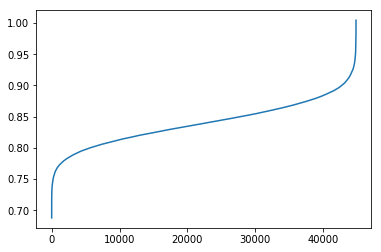

In [555]:
from matplotlib import pyplot as plt 
# plt.plot([x for x in range(len(distances))], distances) 
# plt.ylabel("Distances")
# plt.show() 
x=[k for k in range(len(distances))]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, distances)

plt.show()

In [571]:
cluster=defaultdict(bool)
setpoints=defaultdict(set)
for i in nodes.keys():
    cluster[i]=False
    setpoints[i]={i}
    
# print(cluster)

for i in nodes.keys():
    for j in nodes.keys():
        if(i!=j and j>i and cluster[i]==False and cluster[j]==False):
            
            #########################################################################################
            #########################################################################################
            #########################################################################################
            #########   The percentage of reduction in size depends on the cutoff chosen here ######
            #########  The higher cut off will result in higher compression  ########################
            
            cut_off=0.74645
            
            if(euclidean_distance(nodes[i], nodes[j])<cut_off):
                setpoints[i].add(j)
                del setpoints[j]
                cluster[j]=True
    cluster[i]=True

In [572]:
for key in setpoints.keys():
    print(key," -> ",setpoints[key], "->", len(setpoints[key]))

0  ->  {0} -> 1
1  ->  {1} -> 1
2  ->  {2, 63} -> 2
3  ->  {221, 3, 173} -> 3
4  ->  {89, 4} -> 2
5  ->  {5, 265, 202, 16, 150, 219} -> 6
6  ->  {6} -> 1
7  ->  {37, 7} -> 2
8  ->  {8, 32, 40} -> 3
9  ->  {9, 131} -> 2
10  ->  {10} -> 1
11  ->  {11} -> 1
12  ->  {12} -> 1
13  ->  {13, 135} -> 2
14  ->  {14} -> 1
15  ->  {119, 15} -> 2
17  ->  {17} -> 1
18  ->  {18} -> 1
19  ->  {19} -> 1
20  ->  {184, 20} -> 2
21  ->  {21} -> 1
22  ->  {137, 27, 45, 22} -> 4
23  ->  {157, 23} -> 2
24  ->  {24} -> 1
25  ->  {25} -> 1
26  ->  {26, 74, 141} -> 3
28  ->  {160, 28, 199} -> 3
29  ->  {29} -> 1
30  ->  {30} -> 1
31  ->  {31} -> 1
33  ->  {33} -> 1
34  ->  {34} -> 1
35  ->  {35} -> 1
36  ->  {36} -> 1
38  ->  {38} -> 1
39  ->  {39} -> 1
41  ->  {41} -> 1
42  ->  {42, 269} -> 2
43  ->  {43} -> 1
44  ->  {44} -> 1
46  ->  {46} -> 1
47  ->  {47} -> 1
48  ->  {48} -> 1
49  ->  {49} -> 1
50  ->  {296, 50} -> 2
51  ->  {51} -> 1
52  ->  {52} -> 1
53  ->  {121, 53} -> 2
54  ->  {222, 54} -> 2
55  -> 

In [573]:
print(len(setpoints))

240


Now, we will take the average of the same points in the same cluster and assign it as a new bucket, and delete all the other nodes. For FC1

In [574]:
print(net.state_dict()["fc1.weight"].shape)
temp=[]
for key in setpoints.keys():
    row=torch.zeros(len(net.state_dict()["fc1.weight"][0]), dtype=torch.float)
    for points in setpoints[key]:
        row+=net.state_dict()["fc1.weight"][points]
    row=row/len(setpoints[key])
    temp.append(row)
print(len(temp), temp[0].shape)

torch.Size([300, 256])
240 torch.Size([256])


In [575]:
net.state_dict()["fc1.weight"].resize_(len(temp), len(temp[0]))

tensor([[ 0.0272,  0.0675,  0.0587,  ...,  0.0256, -0.0110, -0.0366],
        [ 0.0592,  0.0532,  0.0201,  ..., -0.0201, -0.0062,  0.0536],
        [-0.0039, -0.0355, -0.0470,  ...,  0.0263, -0.0019, -0.0098],
        ...,
        [-0.0603,  0.0397, -0.0045,  ..., -0.0434,  0.0040,  0.0199],
        [-0.0064,  0.0383, -0.0633,  ...,  0.0619,  0.0373, -0.0214],
        [ 0.0334,  0.0250,  0.0170,  ...,  0.0045, -0.0340,  0.0158]])

In [576]:
# print(net.state_dict()["fc1.weight"][3])

In [577]:
for i in range(len(temp)):
    net.state_dict()["fc1.weight"][i]=temp[i]
# print(net.state_dict()["fc1.weight"][3])

In [578]:
print(net.state_dict()["fc1.weight"].shape)

torch.Size([240, 256])


In [579]:
print(net.state_dict()["fc1.bias"].shape)
temp_bias=torch.zeros(len(temp), dtype=torch.float)
i=0
for key in setpoints.keys():
    for points in setpoints[key]:
        temp_bias[i]+=net.state_dict()["fc1.bias"][points]
    temp_bias[i]/=len(setpoints[key])
    i+=1
print(temp_bias.shape)


torch.Size([300])
torch.Size([240])


In [580]:
net.state_dict()["fc1.bias"].resize_(len(temp_bias))
print(net.state_dict()["fc1.bias"][1])
for i in range(len(temp_bias)):
    net.state_dict()["fc1.bias"][i]=temp_bias[i]
print(net.state_dict()["fc1.bias"][1])

tensor(0.0496)
tensor(0.0496)


In [581]:
print(net.state_dict()["fc1.bias"].shape)

torch.Size([240])


### Now, we have to change FC2 accordingly:

In [582]:
print(net.state_dict()["fc2.weight"].shape)

torch.Size([100, 300])


In [583]:
mat=net.state_dict()["fc2.weight"].t()
print(mat.shape)

torch.Size([300, 100])


In [584]:
temp=[]
for key in setpoints.keys():
    row=torch.zeros(len(mat[0]), dtype=torch.float)
    for points in setpoints[key]:
        row+=mat[points]
    temp.append(row)
print(len(temp), temp[0].shape)

240 torch.Size([100])


In [585]:
newmat=torch.stack(temp, dim=0)
newmat=newmat.t()
print(newmat.shape)

torch.Size([100, 240])


In [586]:
print(net.state_dict()["fc2.weight"].shape)
net.state_dict()["fc2.weight"].resize_(len(newmat), len(newmat[0]))
print(net.state_dict()["fc2.weight"][1][2])

torch.Size([100, 300])
tensor(0.0442)


In [587]:
for i in range(len(newmat)):
    net.state_dict()["fc2.weight"][i]=newmat[i]
print(net.state_dict()["fc2.weight"].shape)
print(net.state_dict()["fc2.weight"][1][2])

torch.Size([100, 240])
tensor(-0.0190)


In [588]:
print(net.state_dict()["fc2.weight"].shape)

torch.Size([100, 240])


In [589]:
print(net.state_dict()["fc2.bias"].shape)

torch.Size([100])


In [590]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 97.280000 %


..

Now, let's try to prune the next layer which consists of 100 nodes.

In [591]:
(net.state_dict()["fc2.weight"]).shape

torch.Size([100, 240])

In [592]:
(net.state_dict()["fc3.weight"]).shape

torch.Size([10, 100])

In [593]:
from collections import defaultdict
nodes=defaultdict(list)
for j in range(len(net.state_dict()["fc2.weight"])):  #Means j is a node of next layer, L2.
    nodes[j]=net.state_dict()["fc2.weight"][j]

print(len(nodes), " ", len(nodes[0]))

100   240


In [594]:
from math import sqrt
distances=[]
for i in nodes.keys():
    for j in nodes.keys():
        if(i!=j and j>i):
            distances.append(euclidean_distance(nodes[i], nodes[j]))

In [595]:
distances.sort()
print(len(distances))

4950


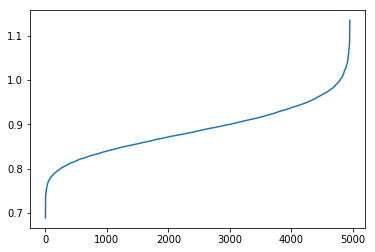

In [596]:
from matplotlib import pyplot as plt 

x=[k for k in range(len(distances))]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, distances)

plt.show()

In [630]:
cluster=defaultdict(bool)
setpoints=defaultdict(set)
for i in nodes.keys():
    cluster[i]=False
    setpoints[i]={i}
    
# print(cluster)

for i in nodes.keys():
    for j in nodes.keys():
        if(i!=j and j>i and cluster[i]==False and cluster[j]==False):
            
            #########################################################################################
            #########################################################################################
            #########################################################################################
            #########   The percentage of reduction in size depends on the cutoff chossen here ######
            #########  The higher cut off will result in higher compression  ########################
            
            cut_off=0.7704
            if(euclidean_distance(nodes[i], nodes[j])<cut_off):
                setpoints[i].add(j)
                del setpoints[j]
                cluster[j]=True
    cluster[i]=True

In [631]:
for key in setpoints.keys():
    print(key," -> ",setpoints[key])

0  ->  {0, 75}
1  ->  {1, 37, 73, 79, 20, 28}
2  ->  {2}
3  ->  {50, 3}
4  ->  {4}
5  ->  {76, 5}
6  ->  {67, 6, 46, 82, 83, 23, 63, 31}
7  ->  {7}
8  ->  {8}
9  ->  {9}
10  ->  {10}
11  ->  {11}
12  ->  {12}
13  ->  {13}
14  ->  {14}
15  ->  {15}
16  ->  {16}
17  ->  {17}
18  ->  {18}
19  ->  {19}
21  ->  {25, 21}
22  ->  {22}
24  ->  {24}
26  ->  {26}
27  ->  {27}
29  ->  {29}
30  ->  {30}
32  ->  {32}
33  ->  {33}
34  ->  {34}
35  ->  {35}
36  ->  {36}
38  ->  {38}
39  ->  {39}
40  ->  {40}
41  ->  {41}
42  ->  {42}
43  ->  {43}
44  ->  {88, 44}
45  ->  {45}
47  ->  {47}
48  ->  {48}
49  ->  {49}
51  ->  {51}
52  ->  {52}
53  ->  {53}
54  ->  {54}
55  ->  {55}
56  ->  {56, 94}
57  ->  {57, 78}
58  ->  {58}
59  ->  {59}
60  ->  {60}
61  ->  {61}
62  ->  {62}
64  ->  {64}
65  ->  {65}
66  ->  {66}
68  ->  {68}
69  ->  {69}
70  ->  {70}
71  ->  {71}
72  ->  {72}
74  ->  {74}
77  ->  {77}
80  ->  {80}
81  ->  {81}
84  ->  {84}
85  ->  {85}
86  ->  {86}
87  ->  {89, 87}
90  ->  {90}
91  

In [632]:
print(len(setpoints))

80


So, we have i many nodes in place of 100. Now, we will first fix the incoming weights this i many nodes.

In [633]:
print(net.state_dict()["fc2.weight"].shape)
temp=[]
for key in setpoints.keys():
    row=torch.zeros(len(net.state_dict()["fc2.weight"][0]), dtype=torch.float)
    for points in setpoints[key]:
        row+=net.state_dict()["fc2.weight"][points]
    row=row/len(setpoints[key])
    temp.append(row)
print(len(temp), temp[0].shape)

torch.Size([100, 240])
80 torch.Size([240])


In [634]:
net.state_dict()["fc2.weight"].resize_(len(temp), len(temp[0]))

tensor([[ 0.0402, -0.0434,  0.0275,  ..., -0.0646, -0.0236,  0.0146],
        [ 0.0027,  0.0438, -0.0190,  ..., -0.0070,  0.0560,  0.0263],
        [ 0.0155, -0.0348,  0.0732,  ...,  0.0446,  0.0367,  0.0531],
        ...,
        [ 0.0384, -0.0197, -0.0223,  ...,  0.0537,  0.0001,  0.0868],
        [ 0.0125,  0.0371, -0.0263,  ...,  0.0192,  0.0348, -0.0642],
        [ 0.0535,  0.0345,  0.0924,  ...,  0.0457, -0.0332,  0.0375]])

In [635]:
for i in range(len(temp)):
    net.state_dict()["fc2.weight"][i]=temp[i]
# print(net.state_dict()["fc1.weight"][3])

In [636]:
print(net.state_dict()["fc2.weight"].shape)

torch.Size([80, 240])


In [637]:
print(net.state_dict()["fc2.bias"].shape)
temp_bias=torch.zeros(len(temp), dtype=torch.float)
i=0
for key in setpoints.keys():
    for points in setpoints[key]:
        temp_bias[i]+=net.state_dict()["fc2.bias"][points]
    temp_bias[i]/=len(setpoints[key])
    i+=1
print(temp_bias.shape)


torch.Size([100])
torch.Size([80])


In [638]:
net.state_dict()["fc2.bias"].resize_(len(temp_bias))
print(net.state_dict()["fc2.bias"][1])
for i in range(len(temp_bias)):
    net.state_dict()["fc2.bias"][i]=temp_bias[i]
print(net.state_dict()["fc2.bias"][1])

tensor(-0.0087)
tensor(0.0082)


In [639]:
print(net.state_dict()["fc2.bias"].shape)

torch.Size([80])


### Now, we have to change FC3 accordingly:

In [640]:
print(net.state_dict()["fc3.weight"].shape)

torch.Size([10, 100])


In [641]:
mat=net.state_dict()["fc3.weight"].t()
print(mat.shape)

torch.Size([100, 10])


In [642]:
temp=[]
for key in setpoints.keys():
    row=torch.zeros(len(mat[0]), dtype=torch.float)
    for points in setpoints[key]:
        row+=mat[points]
    temp.append(row)
print(len(temp), temp[0].shape)

80 torch.Size([10])


In [643]:
newmat=torch.stack(temp, dim=0)
newmat=newmat.t()
print(newmat.shape)

torch.Size([10, 80])


In [644]:
print(net.state_dict()["fc3.weight"].shape)
net.state_dict()["fc3.weight"].resize_(len(newmat), len(newmat[0]))
print(net.state_dict()["fc3.weight"][1][2])

torch.Size([10, 100])
tensor(0.0796)


In [645]:
for i in range(len(newmat)):
    net.state_dict()["fc3.weight"][i]=newmat[i]
print(net.state_dict()["fc3.weight"].shape)
print(net.state_dict()["fc3.weight"][1][2])

torch.Size([10, 80])
tensor(-0.1559)


In [646]:
print(net.state_dict()["fc3.weight"].shape)

torch.Size([10, 80])


In [647]:
print(net.state_dict()["fc3.bias"].shape)

torch.Size([10])


In [648]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 96.170000 %


Here the accuracy actually come up to 76.5, the actual accuracy without any pruning was 89.7. Let's try to freeze the previous layers, and do a fine_tuning. 

In [649]:
i=0
for parameter in net.parameters():
    i+=1
    if(i<5):
        parameter.requires_grad=False

In [650]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=200,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

In [651]:
i=0
for parameter in net.parameters():
    i+=1
    print(i," ",parameter.shape,"\n ",parameter,"\n\n")

1   torch.Size([6, 1, 5, 5]) 
  Parameter containing:
tensor([[[[-0.0192,  0.2511,  0.2183,  0.0210,  0.0190],
          [-0.0522,  0.3645,  0.3561,  0.5513,  0.3440],
          [ 0.0598,  0.5070,  0.6116,  0.6220,  0.2953],
          [ 0.2985,  0.1301,  0.4567,  0.1638,  0.2149],
          [-0.0246,  0.3206,  0.1249,  0.1288, -0.1632]]],


        [[[-0.1775, -0.0977,  0.0400,  0.2623,  0.2931],
          [ 0.0318, -0.1988, -0.1956,  0.1583,  0.1678],
          [-0.2439, -0.2983, -0.0792,  0.2235,  0.3461],
          [-0.0280, -0.2769, -0.1121,  0.0926,  0.3560],
          [-0.1970, -0.1645,  0.1938,  0.2115,  0.1824]]],


        [[[ 0.1362,  0.2118, -0.2154, -0.2076, -0.2334],
          [ 0.2467, -0.0821, -0.1670, -0.0738,  0.2066],
          [ 0.2564,  0.1952,  0.2048,  0.3864,  0.0963],
          [ 0.0786,  0.3546,  0.3418, -0.0168,  0.1037],
          [ 0.0178, -0.2039, -0.1759, -0.0146, -0.0048]]],


        [[[ 0.0299,  0.1694, -0.0029, -0.1827, -0.0718],
          [-0.1909, -0

In [652]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [653]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print(inputs.shape)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print("[{}, {}] loss: {}".format
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Reraining')

[1, 20] loss: 0.0007781430166214705
[1, 40] loss: 0.0006963789463043212
[1, 60] loss: 0.0006210292764008045
[1, 80] loss: 0.0006234911577776075
[1, 100] loss: 0.0007067974004894495
[1, 120] loss: 0.0005666194641962647
[1, 140] loss: 0.0005698428861796856
[1, 160] loss: 0.0005996511951088905
[1, 180] loss: 0.0005987825999036431
[1, 200] loss: 0.0006606169948354363
[1, 220] loss: 0.0005293490635231138
[1, 240] loss: 0.0006380279948934913
[1, 260] loss: 0.0006147282095625996
[1, 280] loss: 0.0007151836287230253
[1, 300] loss: 0.000667616417631507
[2, 20] loss: 0.0006024905927479267
[2, 40] loss: 0.0006141729280352593
[2, 60] loss: 0.0006498260907828808
[2, 80] loss: 0.0004808340426534414
[2, 100] loss: 0.0005606071883812547
[2, 120] loss: 0.00056076773814857
[2, 140] loss: 0.0005572921084240079
[2, 160] loss: 0.0006054048491641879
[2, 180] loss: 0.0006371511779725552
[2, 200] loss: 0.0005526713412255049
[2, 220] loss: 0.0005881285266950727
[2, 240] loss: 0.0005790233127772808
[2, 260] los

[15, 240] loss: 0.00040409001894295215
[15, 260] loss: 0.0004090298707596958
[15, 280] loss: 0.00047984640346840026
[15, 300] loss: 0.00039042309997603297
[16, 20] loss: 0.00037332237511873245
[16, 40] loss: 0.0003823210075497627
[16, 60] loss: 0.00038801103504374623
[16, 80] loss: 0.0003589499536901712
[16, 100] loss: 0.0003279660036787391
[16, 120] loss: 0.0005147481691092253
[16, 140] loss: 0.0003691333970054984
[16, 160] loss: 0.0003622701009735465
[16, 180] loss: 0.0005367193538695574
[16, 200] loss: 0.0005411702785640955
[16, 220] loss: 0.00044743637926876543
[16, 240] loss: 0.0004599529905244708
[16, 260] loss: 0.00033929993072524665
[16, 280] loss: 0.0003903031670488417
[16, 300] loss: 0.00046895410725846887
[17, 20] loss: 0.0004412261159159243
[17, 40] loss: 0.0004207261330448091
[17, 60] loss: 0.0003953906502574682
[17, 80] loss: 0.0003657355126924813
[17, 100] loss: 0.0004216242833063006
[17, 120] loss: 0.0003840871420688927
[17, 140] loss: 0.00047985035087913275
[17, 160] l

In [654]:
torch.save(net.state_dict(), "LeNET_x_y_MNIST_Model_My_Exiperiment_2_Fine_Tuned")

In [655]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 4 * 4, len(net.state_dict()["fc1.weight"]))
        self.fc2 = nn.Linear(len(net.state_dict()["fc1.weight"]), len(net.state_dict()["fc2.weight"]))
        self.fc3 = nn.Linear(len(net.state_dict()["fc2.weight"]), 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
    
net = Net()
net.load_state_dict(torch.load("LeNET_x_y_MNIST_Model_My_Exiperiment_2_Fine_Tuned"))

In [656]:
from torchsummary import summary
device=torch.device("cpu")
model=Net().to(device)
summary(model, input_size=(1, 28, 28), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
         MaxPool2d-2            [-1, 6, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]           2,416
         MaxPool2d-4             [-1, 16, 4, 4]               0
            Linear-5                  [-1, 240]          61,680
            Linear-6                   [-1, 80]          19,280
            Linear-7                   [-1, 10]             810
Total params: 84,342
Trainable params: 84,342
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.32
Estimated Total Size (MB): 0.37
----------------------------------------------------------------


So, number of parametes reduced down to 86k from 110 k

In [657]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 98.540000 %


Resources:
[https://towardsdatascience.com/how-to-cluster-in-high-dimensions-4ef693bacc6] [1/11/2019]